In [1]:
scwid ="066500110010.001" # http://odahub.io/ontology/integral#ScWID
emin = 10. # oda:keV, oda:emin
emax = 900. # oda:keV, oda:emax; oda:limits 15, 1000
nbins = 100
sleep = 0
enabled = True

In [2]:
if emin<0:
    raise Exception("emin can not be <0! got: %lg"%emin)

In [3]:
if sleep > 0:
    import time
    time.sleep(sleep)

In [4]:
from ftplib import FTP
import astropy.io.fits as fits
from io import StringIO
import os
from nb2workflow.workflows import WorkflowException
import numpy as np
from astropy.table import Table

In [5]:
if len(scwid) != 16:
    raise WorkflowException("bad scwid: "+scwid)

In [6]:
if False:

    fn="events.fits"
    os.system("wget ftp://isdcarc.unige.ch/arc/rev_3/scw/"+scwid[:4]+"/"+scwid+"/isgri_events.fits.gz -O "+fn)

    os.system("ls -ltor")

    events = fits.open(fn)[3].data

    energies = events['ISGRI_ENERGY']
else:
    energies = np.random.normal(100, 100, 10000)

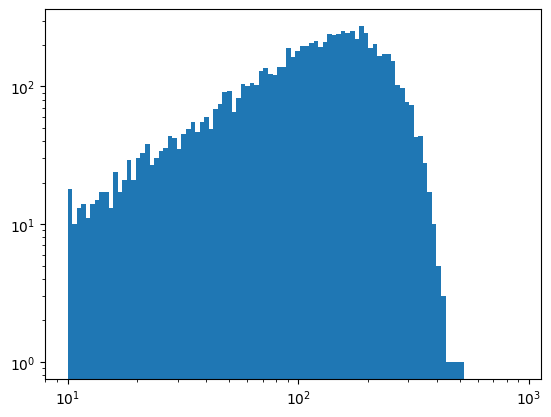

In [7]:
fn="spec.png"

import matplotlib.pyplot as plt
plt.figure()
h=plt.hist(energies, np.logspace(np.log10(emin),np.log10(emax),nbins),log=True)
plt.semilogx()
plt.savefig(fn)

#Image(fn)

In [8]:
total_events=len(energies)
total_events

10000

In [9]:
fits_file = "energies.fits"

fits.BinTableHDU(Table({'ENERGY': energies})).writeto(fits_file, overwrite=True)

In [10]:
spectrum_png = fn # http://odahub.io/ontology/preview/png
spectrum = h[0].tolist() # http://odahub.io/ontology/preview/png
energies_fits_file = fits_file
total_events 

10000